In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pip_palette=["#A9C6D9", "#F28729", "#D9593D"]
sns.set_theme(style="whitegrid", palette=pip_palette)

In [4]:
df = pd.read_excel(os.path.join("..","Data","SMC_DATA_clean.xlsx"))
cb = pd.read_csv(os.path.join("..","Data","Annotations","behaviors_final_participant_level.csv"))
cg = pd.read_csv(os.path.join("..","Data","Annotations","goals_final_participant_level.csv"))

In [5]:
demo_cols = [c for c in df.columns if c.startswith("DEMO")]

for c in demo_cols:
    tmp = df.copy()
    tmp = df[['ParticipantID',c]].groupby('ParticipantID').first()
    df = df.drop(c, axis=1)
    df = df.merge(tmp, on="ParticipantID")

In [6]:
def gender_map(x):
    if x in ("male", "female"):
        return x
    else:
        return "other"

df['DEMO_gender'] = df['DEMO_gender'].apply(gender_map)

In [7]:
def academic_year_map(x):
    if x in ("Junior", "Sophomore", "Freshman", "Senior"):
        return x
    else:
        return "other"

df['DEMO_academic_year'] = df['DEMO_academic_year'].apply(academic_year_map)

In [8]:
# join stated behaviors data
cb = cb[["ParticipantID"] + [c for c in cb.columns if c.endswith("_az")]]
for c in cb.columns:
    if c == 'ParticipantID':
        pass
    cb[c.split("_")[0]] = cb[c]
for c in cb.columns:
    if c.endswith("_az"):
        cb = cb.drop(c, axis=1)
cb = cb.rename(columns={'Past':'Past_b'})

df = df.merge(cb, on="ParticipantID")

In [9]:
# join goals data
cg = cg[["ParticipantID"] + [c for c in cg.columns if c.endswith(" (az)")]]
for c in cg.columns:
    if c == 'ParticipantID':
        pass
    cg[c.split(" (")[0]] = cg[c]
for c in cg.columns:
    if c.endswith("(az)"):
        cg = cg.drop(c, axis=1)
cg = cg.rename(columns={'Past':'Past_g'})

df = df.merge(cg, on="ParticipantID")

## Problematic and Clinical SMU (BSMAS >= 19, 24)

In [10]:
df['BSMAS_problematic'] = (df['BSMAS_total'] >= 19).astype(bool)
df['BSMAS_clinical'] = (df['BSMAS_total'] >= 24).astype(bool)

In [11]:
df[df['SURVEY'] == 0][['BSMAS_problematic','BSMAS_clinical']].describe()

,BSMAS_problematic,BSMAS_clinical
count,506,506
unique,2,2
top,False,False
freq,334,462


In [12]:
df[df['SURVEY'] == 4][['BSMAS_problematic','BSMAS_clinical']].describe()

,BSMAS_problematic,BSMAS_clinical
count,462,462
unique,2,2
top,False,False
freq,387,451


In [13]:
df_starting_prob = df[df['SURVEY'] == 0][['ParticipantID','BSMAS_problematic']].groupby('ParticipantID').first()\
                    .rename(columns={'BSMAS_problematic':'SMU_problematic_start'})
df_ending_prob = df[df['SURVEY'] == 4][['ParticipantID','BSMAS_problematic']].groupby('ParticipantID').first()\
                    .rename(columns={'BSMAS_problematic':'SMU_problematic_end'})
df_starting_clin = df[df['SURVEY'] == 0][['ParticipantID','BSMAS_clinical']].groupby('ParticipantID').first()\
                    .rename(columns={'BSMAS_clinical':'SMU_clinical_start'})
df_ending_clin = df[df['SURVEY'] == 4][['ParticipantID','BSMAS_clinical']].groupby('ParticipantID').first()\
                    .rename(columns={'BSMAS_clinical':'SMU_clinical_end'})

In [14]:
df = df.merge(df_starting_prob, on='ParticipantID')
df = df.merge(df_ending_prob, on='ParticipantID')
df = df.merge(df_starting_clin, on='ParticipantID')
df = df.merge(df_ending_clin, on='ParticipantID')

In [15]:
df

,Unnamed: 0,UniqueID,ParticipantID,ParticipantRecordCount,SEMESTER,SURVEY,Timestamp,First Name,Last Name,Email Address,...,DEMO_major,DEMO_gender,DEMO_ethnicity,DEMO_smartphone,BSMAS_problematic,BSMAS_clinical,SMU_problematic_start,SMU_problematic_end,SMU_clinical_start,SMU_clinical_end
0,0,a9dbc45ece05459c91b7073f94165d9d,5710075738,5,Fall 2020,0,2020-09-20 17:17:09.790,Myles,Aquino,NaN,...,TAM/Creative Technology & Design Minor,male,Filipino,Yes,False,False,False,False,False,False
1,1,e25bccd85f6e4450b4d7482ed2368fa0,5710075738,5,Fall 2020,1,2020-09-26 21:36:08.963,Myles,Aquino,NaN,...,TAM/Creative Technology & Design Minor,male,Filipino,Yes,False,False,False,False,False,False
2,2,e58dce6b780b4e2b89f850f4b8a91352,5710075738,5,Fall 2020,2,2020-10-04 21:12:24.774,Myles,Aquino,NaN,...,TAM/Creative Technology & Design Minor,male,Filipino,Yes,False,False,False,False,False,False
3,3,34c77a8cc9db4cf4b3e05cfbe3314443,5710075738,5,Fall 2020,3,2020-10-12 10:23:31.748,Myles,Aquino,NaN,...,TAM/Creative Technology & Design Minor,male,Filipino,Yes,False,False,False,False,False,False
4,4,1f92e68056a94c0584ac911c9b264766,5710075738,5,Fall 2020,4,2020-10-25 23:49:54.287,Myles,Aquino,NaN,...,TAM/Creative Technology & Design Minor,male,Filipino,Yes,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2598,e7e54f65d8a84454bbb16e636906cdcf,712532050,5,Spring 2023,3,2023-03-05 18:47:48.433,Emmy,Wolf,mawo7163@colorado.edu,...,Computer Science,female,White,Yes,True,False,True,True,False,False
2243,2599,a10931d67f174713940e8afdbe4fa061,712532050,5,Spring 2023,4,2023-03-12 22:41:24.079,Emmy,Wolf,mawo7163@colorado.edu,...,Computer Science,female,White,Yes,True,False,True,True,False,False
2244,2602,6337fd8091ca4853857ec2fccf7e8e95,5271017416,3,Spring 2023,0,2023-02-14 11:16:01.382,Joe,Yoder,NaN,...,TAM/Creative Technology & Design Major,male,White,Yes,False,False,False,False,False,False
2245,2603,59cb813929b04301b74a1f3ff5fc7ac8,5271017416,3,Spring 2023,2,2023-03-01 20:33:01.372,Joe,Yoder,joyo1849@colorado.edu,...,TAM/Creative Technology & Design Major,male,White,Yes,False,False,False,False,False,False


# Social Media Addiction Over Time

## Triptych

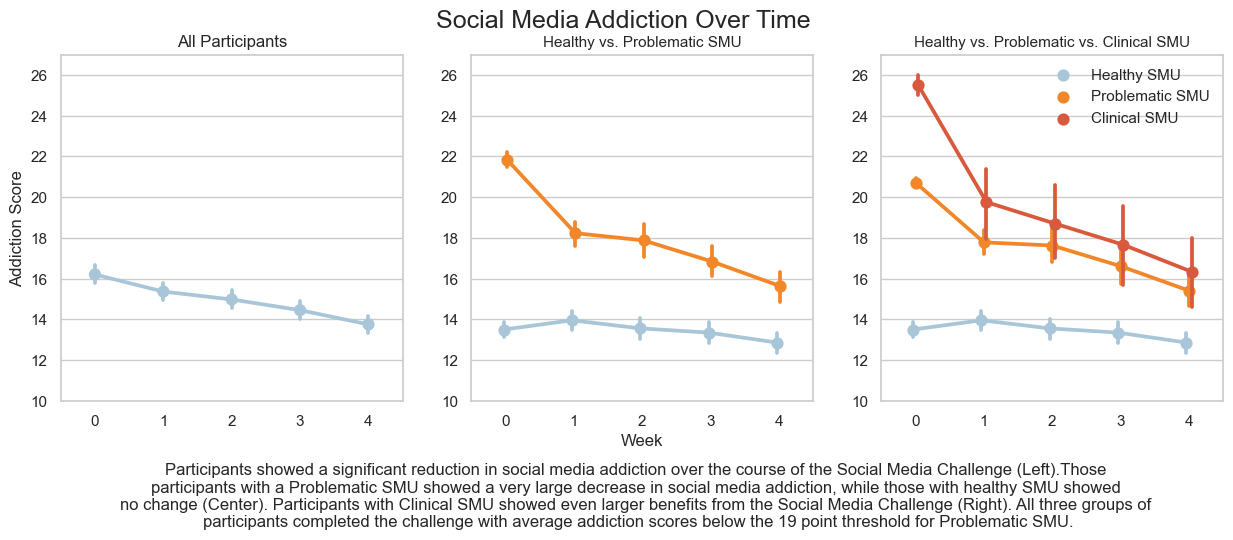

In [16]:
plt.figure(figsize=(15,4.5))      # do not change this 

plt.subplot(131)                # do not change this line
# (1) Overall addiction over time
g = sns.pointplot(data=df, x="SURVEY", y="BSMAS_total", dodge=0.03)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((10,27))
g.set_xlabel("")
g.set_ylabel("Addiction Score")
g.set_title("All Participants")
#g.legend(title='Gender')


plt.subplot(132)               # do not change this line
# (2) broken down by PSMU
g = sns.pointplot(data=df, x="SURVEY", y="BSMAS_total", hue="SMU_problematic_start", dodge=True)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((10,27))
g.set_xlabel("Week")
g.set_ylabel("")
g.set_title("Healthy vs. Problematic SMU", fontsize=11)
#g.legend(title='Starting Problematic SMU')#, frameon=False)
g.get_legend().remove()

plt.subplot(133)               # do not change this line
# (2) residual plot
# further broken down into clinical and PSMU

def map_starting_smu(x):
    if x >= 24:
        return "Clinical SMU"
    if x >= 19:
        return "Problematic SMU"
    return "Healthy SMU"

tmp = df[df['SURVEY'] == 0].copy()
tmp['starting_smu'] = tmp['BSMAS_total'].apply(map_starting_smu)
tmp = tmp[['ParticipantID', 'starting_smu']]
df_w_tmp = df.copy()
df_w_tmp = df_w_tmp.merge(tmp, on="ParticipantID")
g = sns.pointplot(data=df_w_tmp, x="SURVEY", y="BSMAS_total", hue="starting_smu", dodge=True)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((10,27))
g.set_xlabel("")
g.set_ylabel("")
g.set_title("Healthy vs. Problematic vs. Clinical SMU", fontsize=11)
g.legend(frameon=False)

#plt.tight_layout()   
plt.suptitle('Social Media Addiction Over Time', fontsize=18)

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_triptych.png"))

txt = "Participants showed a significant reduction in social media addiction over the course of the Social Media Challenge (Left)."
txt += "Those \nparticipants with a Problematic SMU showed a very large decrease in social media addiction, while those with healthy SMU showed \nno change (Center). "
txt += "Participants with Clinical SMU showed even larger benefits from the Social Media Challenge (Right). "
txt += "All three groups of \nparticipants completed the challenge with average addiction scores below the 19 point threshold for Problematic SMU."

plt.gcf()
plt.figtext(.51, -.17, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_triptych_w_caption.png"), bbox_inches="tight")

#plt.show()

## All participants

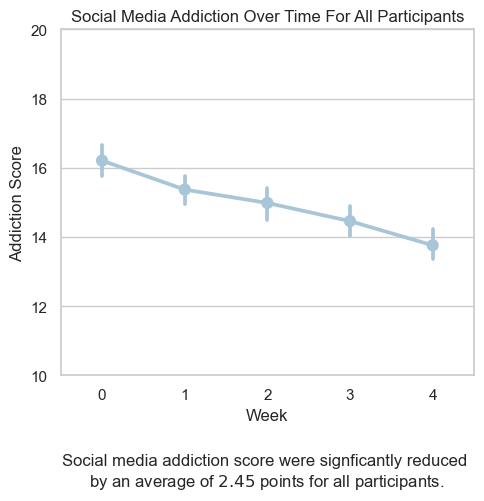

In [17]:
plt.figure(figsize=(5,4.5))
g = sns.pointplot(data=df, x="SURVEY", y="BSMAS_total", dodge=0.03)
g.set_ylim((10,20))
g.set_xlabel("Week")
g.set_ylabel("Addiction Score")
g.set_title("Social Media Addiction Over Time For All Participants")
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_all_participants.png"))

avg_change = round(df[df['SURVEY'] == 0]['BSMAS_total'].mean() - df[df['SURVEY'] == 4]['BSMAS_total'].mean(), 2)

txt = "Social media addiction score were signficantly reduced \nby an average of ${}$ points for all participants.".format(avg_change)

plt.gcf()
plt.figtext(.55, -.1, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_all_participants_w_caption.png"), bbox_inches="tight")

## Problematic vs Healthy SMU

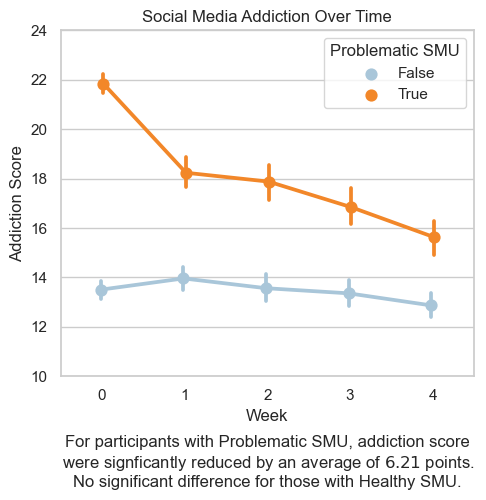

In [18]:
plt.figure(figsize=(5,4.5))
g = sns.pointplot(data=df, x="SURVEY", y="BSMAS_total", hue="SMU_problematic_start", dodge=0.03)
g.legend(title='Problematic SMU')#, frameon=False)
g.set_ylim((10,24))
g.set_xlabel("Week")
g.set_ylabel("Addiction Score")
g.set_title("Social Media Addiction Over Time")
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_healthy_v_psmu.png"))

df_h = df[df['SMU_problematic_start'] == 0].copy()
df_p = df[df['SMU_problematic_start'] == 1].copy()
avg_change_healthy = round(df_h[df_h['SURVEY'] == 0]['BSMAS_total'].mean() - df_h[df_h['SURVEY'] == 4]['BSMAS_total'].mean(), 2)
avg_change_problem = round(df_p[df_p['SURVEY'] == 0]['BSMAS_total'].mean() - df_p[df_p['SURVEY'] == 4]['BSMAS_total'].mean(), 2)

txt = "For participants with Problematic SMU, addiction score\n were signficantly reduced by an average of ${}$ points. \n".format(avg_change_problem)
txt += "No significant difference for those with Healthy SMU."

plt.gcf()
plt.figtext(.55, -.1, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_healthy_v_psmu_w_caption.png"), bbox_inches="tight")

## Healthy, PSMU, CSMU

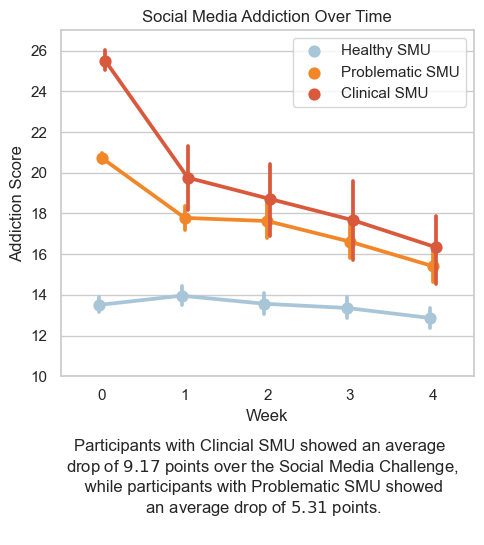

In [19]:
def map_starting_smu(x):
    if x >= 24:
        return "Clinical SMU"
    if x >= 19:
        return "Problematic SMU"
    return "Healthy SMU"

plt.figure(figsize=(5,4.5))
tmp = df[df['SURVEY'] == 0].copy()
tmp['starting_smu'] = tmp['BSMAS_total'].apply(map_starting_smu)
tmp = tmp[['ParticipantID', 'starting_smu']]
df_w_tmp = df.copy()
df_w_tmp = df_w_tmp.merge(tmp, on="ParticipantID")
g = sns.pointplot(data=df_w_tmp, x="SURVEY", y="BSMAS_total", hue="starting_smu", dodge=True)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((10,27))
g.set_xlabel("Week")
g.set_ylabel("Addiction Score")
g.set_title("Social Media Addiction Over Time")#, fontsize=11)
g.legend()#frameon=False)
plt.tight_layout()


plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_healthy_prob_clin.png"))


df_p = df_w_tmp[df_w_tmp['starting_smu'] == 'Problematic SMU']
df_c = df_w_tmp[df_w_tmp['starting_smu'] == 'Clinical SMU']

avg_change_clin = round(df_c[df_c['SURVEY'] == 0]['BSMAS_total'].mean() - df_c[df_c['SURVEY'] == 4]['BSMAS_total'].mean(), 2)
avg_change_prob = round(df_p[df_p['SURVEY'] == 0]['BSMAS_total'].mean() - df_p[df_p['SURVEY'] == 4]['BSMAS_total'].mean(), 2)

txt = "Participants with Clincial SMU showed an average \ndrop of ${}$ points over the Social Media Challenge,\n while ".format(avg_change_clin)
txt += "participants with Problematic SMU showed\n an average drop of ${}$ points. \n".format(avg_change_prob)

plt.figtext(.54, -.2, txt, ha='center')

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_over_time_healthy_prob_clin_w_caption.png"), bbox_inches="tight")


## Social Media Addiction by Gender - Triptych

/var/folders/m8/3_46d0kx3550tv6p25r135jm0000gn/T/ipykernel_31298/2133759101.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['0%','20%','40%','60%','80%','100%'])


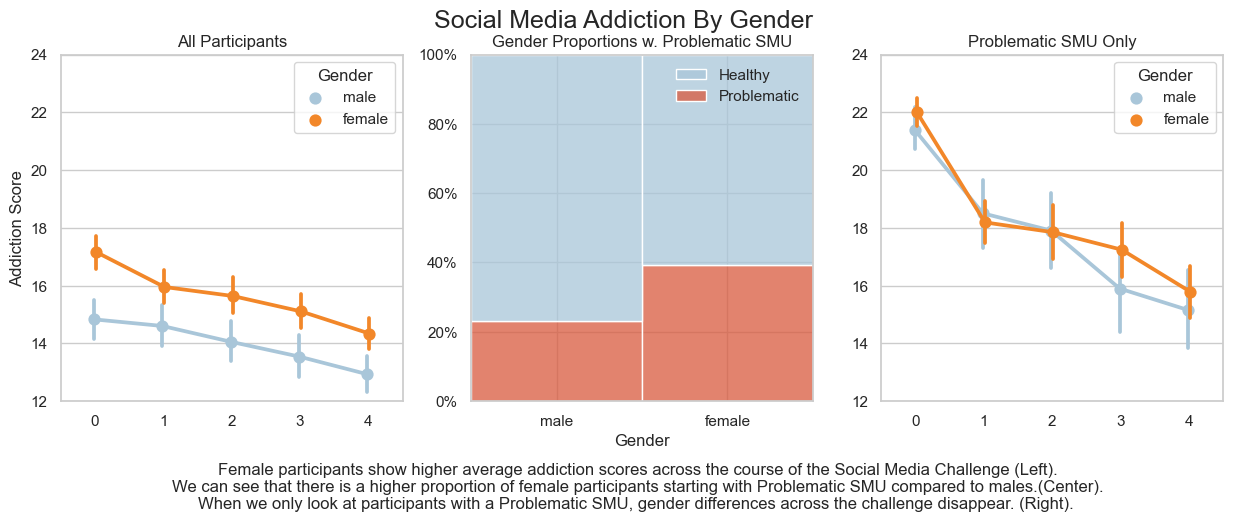

In [21]:
plt.figure(figsize=(15,4.5))      # do not change this 

gender_df = df[df["DEMO_gender"] != "other"].copy()

plt.subplot(131)                # do not change this line
# (1) Overall addiction over time
g = sns.pointplot(data=gender_df, x="SURVEY", y="BSMAS_total", hue="DEMO_gender", hue_order=["male","female"], dodge=0.03)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((12,24))
g.set_xlabel("")
g.set_ylabel("Addiction Score")
g.set_title("All Participants")
g.legend(title='Gender')
#g.legend(title='Gender')


plt.subplot(132)               # do not change this line

def smu_hue_map(x):
    if x == True:
        return "Problematic"
    else:
        return "Healthy"

tmp = df[df['DEMO_gender'] != "other"].copy()
tmp['smu_hue'] = tmp['SMU_problematic_start'].apply(smu_hue_map)
g = sns.histplot(x='DEMO_gender', data=tmp, hue='smu_hue', multiple='fill', palette=[pip_palette[0], pip_palette[2]])
legend = g.get_legend()
legend.set_title("")
legend.set_label("True")
legend.set_frame_on(False)
g.set_xlabel("Gender")
g.set_ylabel("")
g.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
g.set_title("Gender Proportions w. Problematic SMU")

plt.subplot(133)               # do not change this line
# (2) residual plot
# further broken down into clinical and PSMU

g = sns.pointplot(data=gender_df[gender_df["SMU_problematic_start"] == 1], x="SURVEY", y="BSMAS_total", hue="DEMO_gender", hue_order=["male","female"], dodge=0.03)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((12,24))
g.set_xlabel("")
g.set_ylabel("")
g.set_title("Problematic SMU Only")
g.legend(title='Gender')

#plt.tight_layout()   
plt.suptitle('Social Media Addiction By Gender', fontsize=18)

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_triptych.png"))


txt = "Female participants show higher average addiction scores across the course of the Social Media Challenge (Left).\n"
txt += "We can see that there is a higher proportion of female participants starting with Problematic SMU compared to males.(Center).\n"
txt += "When we only look at participants with a Problematic SMU, gender differences across the challenge disappear. (Right). "

plt.gcf()
plt.figtext(.51, -.13, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_triptych_w_caption.png"), bbox_inches="tight")
#plt.show()

## Gender - All Participants

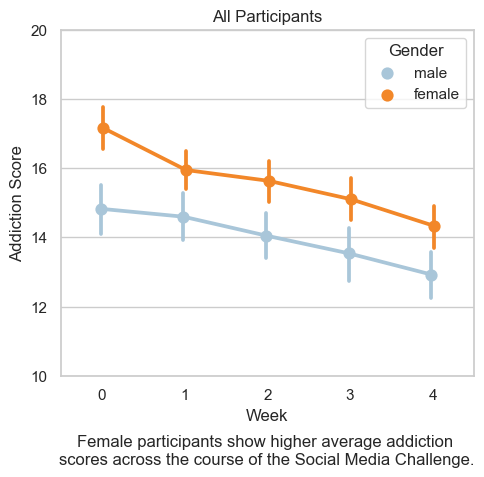

In [22]:
plt.figure(figsize=(5,4.5))
g = sns.pointplot(data=gender_df, x="SURVEY", y="BSMAS_total", hue="DEMO_gender", hue_order=["male","female"], dodge=0.03)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((10,20))
g.set_xlabel("Week")
g.set_ylabel("Addiction Score")
g.set_title("All Participants")
g.legend(title='Gender')
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_overall.png"))


txt = "Female participants show higher average addiction \nscores across the course of the Social Media Challenge."

plt.gcf()
plt.figtext(.55, -.05, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_overall_w_caption.png"), bbox_inches="tight")

## Proportions of Problematic SMU

/var/folders/m8/3_46d0kx3550tv6p25r135jm0000gn/T/ipykernel_31298/226784609.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(['0%','20%','40%','60%','80%','100%'])


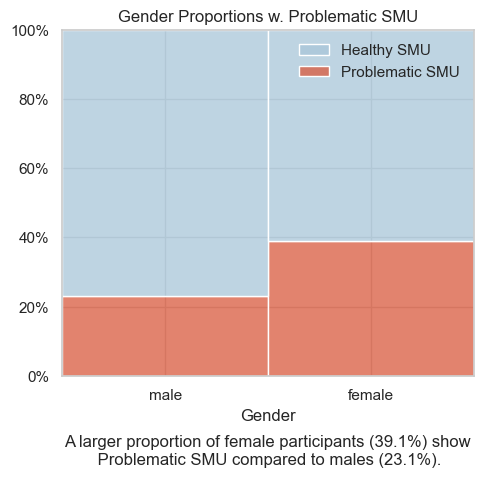

In [23]:
def smu_hue_map(x):
    if x == True:
        return "Problematic SMU"
    else:
        return "Healthy SMU"

plt.figure(figsize=(5,4.5))
tmp = df[df['DEMO_gender'] != "other"].copy()
tmp['smu_hue'] = tmp['SMU_problematic_start'].apply(smu_hue_map)
g = sns.histplot(x='DEMO_gender', data=tmp, hue='smu_hue', multiple='fill', palette=[pip_palette[0], pip_palette[2]])
legend = g.get_legend()
legend.set_title("")
legend.set_label("True")
legend.set_frame_on(False)
g.set_xlabel("Gender")
g.set_ylabel("")
g.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
g.set_title("Gender Proportions w. Problematic SMU")
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","gender_proportions_psmu.png"))

f_prop = round(tmp[tmp['DEMO_gender'] == 'female']['SMU_problematic_start'].mean() * 100, 1)
m_prop = round(tmp[tmp['DEMO_gender'] == 'male']['SMU_problematic_start'].mean() * 100, 1)
txt = "A larger proportion of female participants ({}%) show\n Problematic SMU compared to males ({}%).".format(f_prop, m_prop)

plt.gcf()
plt.figtext(.55, -.05, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","gender_proportions_psmu_w_caption.png"), bbox_inches="tight")

## Controlled for Problematic SMU

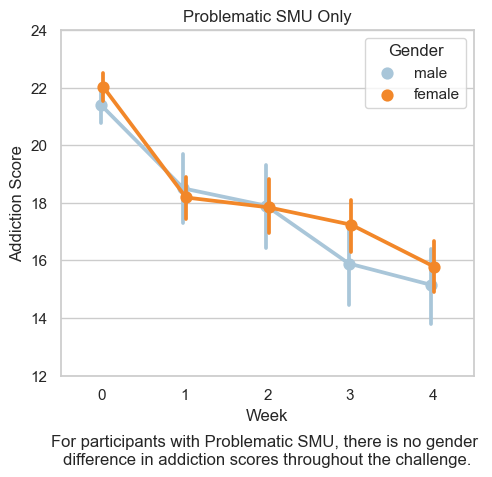

In [24]:
plt.figure(figsize=(5,4.5))
g = sns.pointplot(data=gender_df[gender_df["SMU_problematic_start"] == 1], x="SURVEY", y="BSMAS_total", hue="DEMO_gender", hue_order=["male","female"], dodge=0.03)
#g.set_axis_labels("Survey Number", "BSMAS Score", labelpad=10)
g.set_ylim((12,24))
g.set_xlabel("Week")
g.set_ylabel("Addiction Score")
g.set_title("Problematic SMU Only")
g.legend(title='Gender')
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_psmu.png"))


txt = "For participants with Problematic SMU, there is no gender \ndifference in addiction scores throughout the challenge."

plt.gcf()
plt.figtext(.55, -.05, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_by_gender_psmu_w_caption.png"), bbox_inches="tight")

# Correlations

## Social Media addiction & Stress

<Figure size 500x450 with 0 Axes>

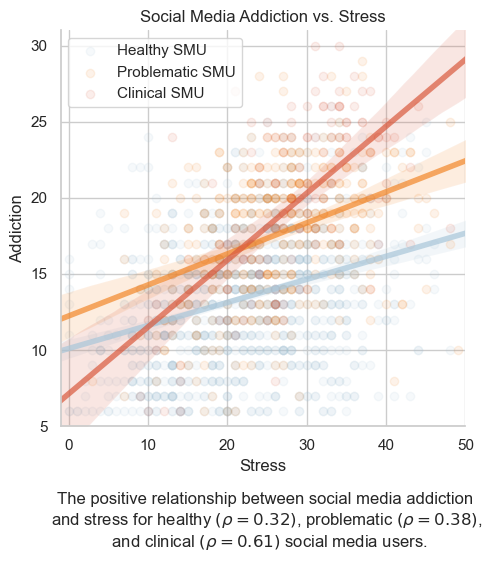

In [25]:
plt.figure(figsize=(5,4.5))
g = sns.lmplot(data=df_w_tmp, x="PSS_total", y="BSMAS_total", hue="starting_smu", ci=95, truncate=False, \
           scatter_kws={'alpha':0.1}, line_kws=dict(alpha=0.7, linewidth=4), legend=False)
#g._legend.set_title("")
#g._legend.set_location("upper left")
plt.ylim(5,31)
plt.xlim(-1,50)
plt.ylabel("Addiction")
plt.xlabel("Stress")
plt.title("Social Media Addiction vs. Stress")
plt.legend()
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_pss_corr.png"))

healthy_bsmas_pss_corr = round(df_w_tmp[df_w_tmp['starting_smu'] == 'Healthy SMU'][['PSS_total','BSMAS_total']].corr().iloc[0,1], 2)
problem_bsmas_pss_corr = round(df_w_tmp[df_w_tmp['starting_smu'] == 'Problematic SMU'][['PSS_total','BSMAS_total']].corr().iloc[0,1], 2)
clinic_bsmas_pss_corr = round(df_w_tmp[df_w_tmp['starting_smu'] == 'Clinical SMU'][['PSS_total','BSMAS_total']].corr().iloc[0,1], 2)


txt = "The positive relationship between social media addiction \nand stress for healthy $(\\rho={})$, problematic $(\\rho={})$,\n and clinical $(\\rho={})$ social media users."
txt = txt.format(healthy_bsmas_pss_corr, problem_bsmas_pss_corr, clinic_bsmas_pss_corr)

plt.gcf()
plt.figtext(.55, -.11, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_pss_corr_w_caption.png"), bbox_inches="tight")

## Social Media Addiction and Self Assessment Score

<Figure size 500x450 with 0 Axes>

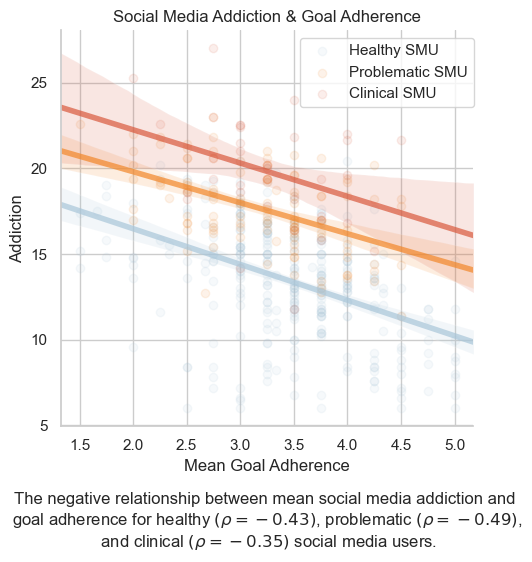

In [26]:
plt.figure(figsize=(5,4.5))
tmp = df_w_tmp.groupby("ParticipantID").agg({"BSMAS_total":"mean", "WEEKLY_self_assessment_score":"mean", "starting_smu":"first"}).copy()

sns.lmplot(data=tmp, y="BSMAS_total", x="WEEKLY_self_assessment_score", hue="starting_smu", hue_order=["Healthy SMU","Problematic SMU","Clinical SMU"],
          ci=90, truncate=False, scatter_kws={'alpha':0.1}, line_kws=dict(alpha=0.7, linewidth=4), legend=False)
#plt.ylim((1.3,5.2))
plt.xlabel("Mean Goal Adherence")
plt.ylabel("Addiction")
plt.title("Social Media Addiction & Goal Adherence")
plt.legend(bbox_to_anchor=(.52, .5, 0.5, 0.5))
plt.tight_layout()

plt.gcf()
plt.savefig(os.path.join("..","Data","imgs","bsmas_self_assess_corr.png"))

healthy_corr = round(tmp[tmp['starting_smu'] == 'Healthy SMU'][['WEEKLY_self_assessment_score','BSMAS_total']].corr().iloc[0,1], 2)
problem_corr = round(tmp[tmp['starting_smu'] == 'Problematic SMU'][['WEEKLY_self_assessment_score','BSMAS_total']].corr().iloc[0,1], 2)
clinic_corr = round(tmp[tmp['starting_smu'] == 'Clinical SMU'][['WEEKLY_self_assessment_score','BSMAS_total']].corr().iloc[0,1], 2)


txt = "The negative relationship between mean social media addiction and \ngoal adherence for healthy $(\\rho={})$, problematic $(\\rho={})$,\n and clinical $(\\rho={})$ social media users."
txt = txt.format(healthy_corr, problem_corr, clinic_corr)

plt.gcf()
plt.figtext(.55, -.11, txt, ha='center')
plt.savefig(os.path.join("..","Data","imgs","bsmas_self_assess_corr_w_caption.png"), bbox_inches="tight")